# EDA with Python and apply Logistic Regression

For this we will be working with the Titanic Dataset from Kaggle. This is a very famous dataset and very often used by student as their first step in ML.

We'll be trying to predict a classification -survival or deceased .Let's begin or understanding of implementing the logistic regression in python for classification.

We'll use a 'semi-cleaner' version of the titanic dataset.

Lets import Libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The data
Let's read the titanic _train.csv file into a pandas dataframe

In [83]:
train = pd.read_csv('titanic_train.csv')

In [84]:
train.head()

#SibSP(sibling spouse),Parch(parent child)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing Data
We can use seaborn to create a simple heatmap  to see where we are missing data!

In [85]:
train.isnull()# if null means true  else false

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

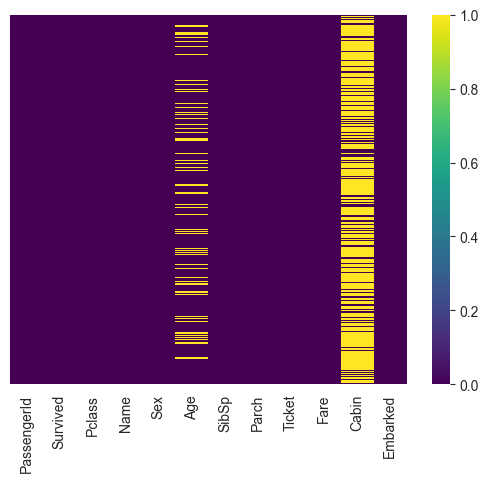

In [86]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

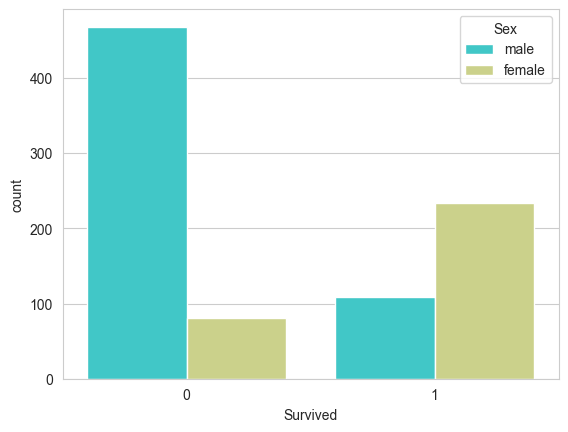

In [87]:
sns.countplot(x = 'Survived',hue = 'Sex',data = train,palette = 'rainbow')

<Axes: xlabel='Survived', ylabel='count'>

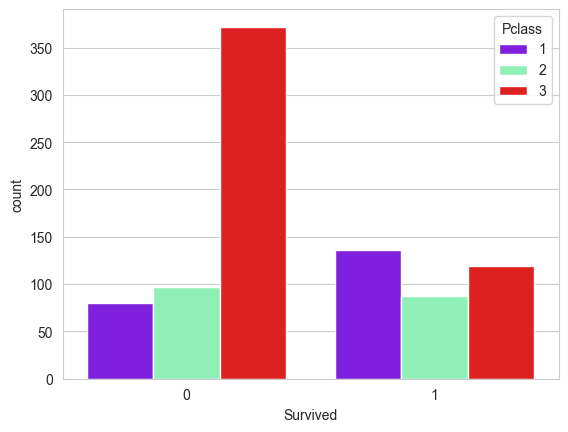

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue ='Pclass',data=train,palette = 'rainbow')

C:\Users\Shambhavi\AppData\Local\Temp\ipykernel_8704\2447383796.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False, color = 'darkred',bins=30)


<Axes: xlabel='Age'>

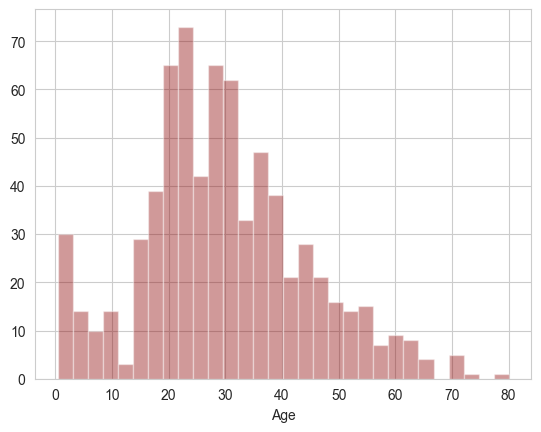

In [89]:
sns.distplot(train['Age'].dropna(),kde=False, color = 'darkred',bins=30)

<Axes: >

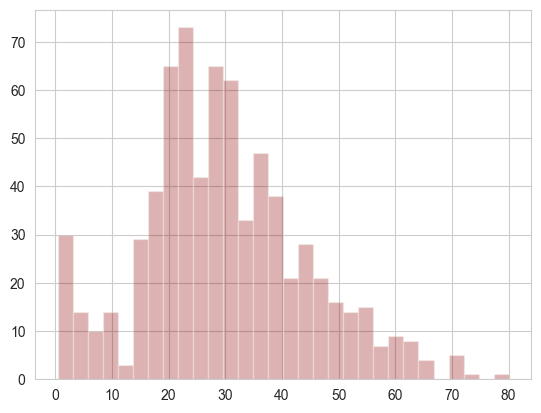

In [90]:
train['Age'].hist(bins=30,color= 'darkred',alpha =0.3)

<Axes: xlabel='SibSp', ylabel='count'>

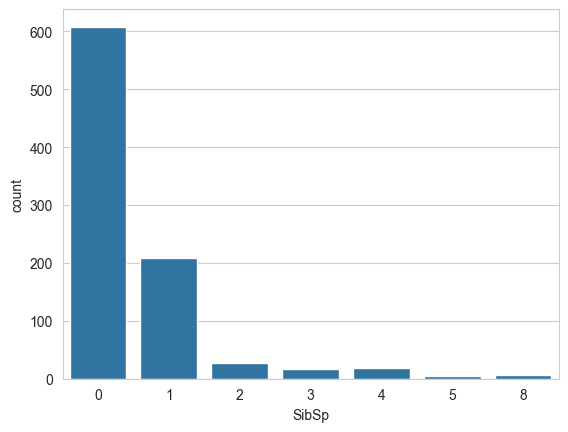

In [91]:
sns.countplot(x='SibSp',data=train)

<Axes: >

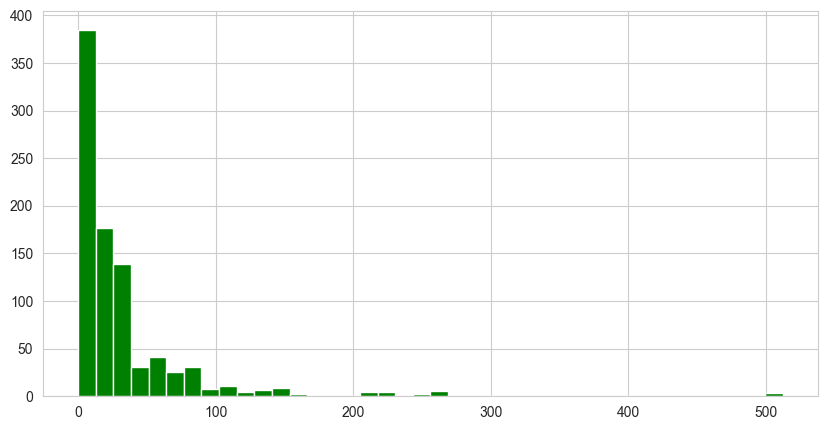

In [92]:
train['Fare'].hist(color='green',bins = 40,figsize=(10,5))

# Data cleaning 

We want to fill in missing age data insteead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passangerns (imputation). Howeveer we can be smarter about this and check the average age by passenger class. For example:

C:\Users\Shambhavi\AppData\Local\Temp\ipykernel_8704\2316379001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

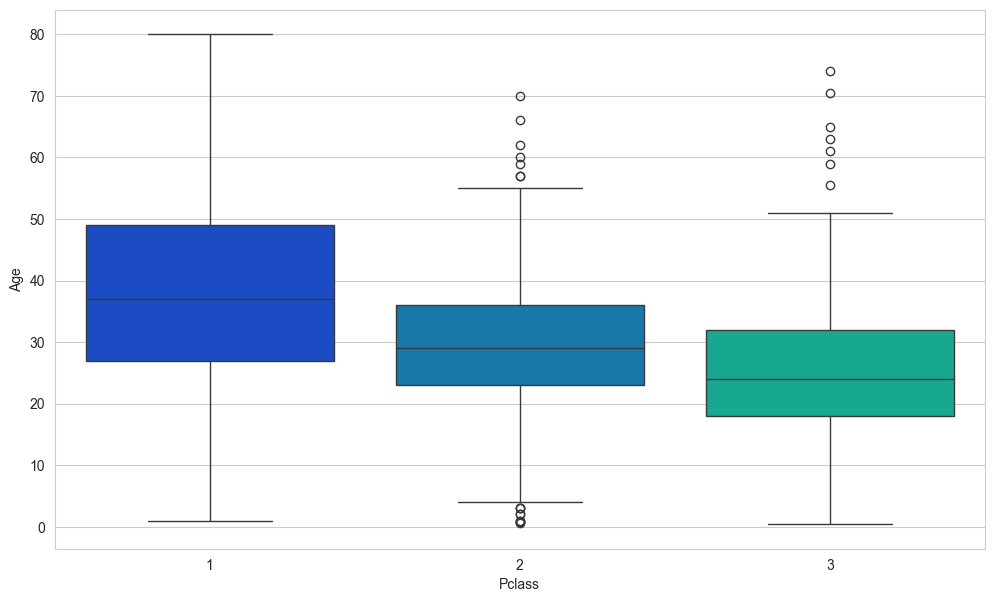

In [93]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age',data=train,palette='winter')

We can see wealthier passengers in the higher classes tends to be older, which makes sense.
We'll wuse these average values to impute based on Pclass for Age.

In [94]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [95]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\Shambhavi\AppData\Local\Temp\ipykernel_8704\3983263054.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Shambhavi\AppData\Local\Temp\ipykernel_8704\3983263054.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

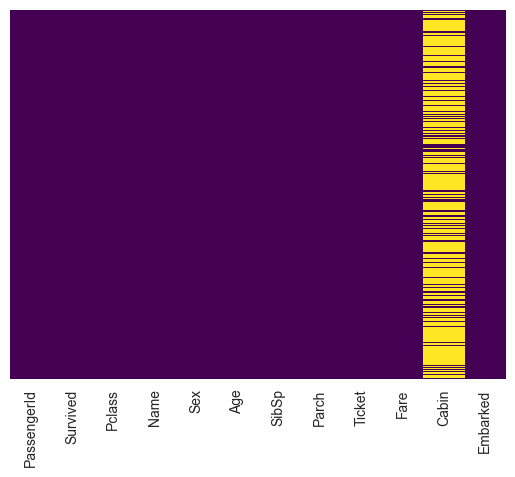

In [96]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [97]:
train.drop('Cabin',axis = 1,inplace  =True)

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

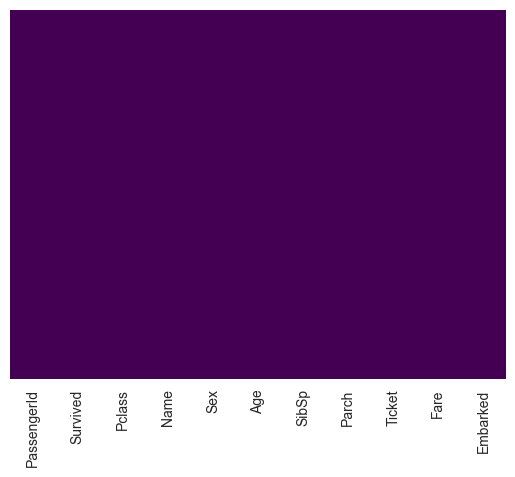

In [99]:
sns.heatmap(train.isnull(),yticklabels=False,cbar = False,cmap ='viridis')

In [100]:
train.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [101]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [102]:
train.dropna(inplace=True)

Converting Categorical features
We'll need to convert categorical features to dummy variable using pandas! Otherwise  pur machine
learning algorithmwon't be directly take in those features as inputs

In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [104]:
pd.get_dummies(train['Embarked'],drop_first = True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [105]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [106]:

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [107]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [108]:
train = pd.concat([train,sex,embark],axis = 1)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


# Building a Logistic Regression model

Let's start by spillting ou data into a training set and test set(there is another test.csv file that you can play around with in case you want to use this data for training.)

# Train Test Split

In [110]:
train.drop('Survived',axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [111]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,x_test,y_train,y_test = train_test_split(train.drop('Survived', axis = 1),train['Survived'],test_size = 0.30,random_state = 101)

# Training and Prediciting

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shambhavi\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [125]:
prediction = logmodel.predict(x_test)

In [126]:
from sklearn.metrics import confusion_matrix

In [127]:
accuracy= confusion_matrix(y_test,prediction)

In [128]:
accuracy

array([[148,  15],
       [ 39,  65]], dtype=int64)

In [129]:
from sklearn.metrics import accuracy_score

In [130]:
accuracy = accuracy_score(y_test,prediction)

In [131]:
prediction

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# Evaluation

We can check precision , recall , f1-score using classification report!

In [134]:
from sklearn.metrics import classification_report

In [135]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267




Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

    Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
    Maybe the Cabin letter could be a feature
    Is there any info you can get from the ticket?